# Unit 03-02 Chaos

In this notebook, we will explore some common features of non-linear systems:

1. Feigenbaum $\delta$-number.
2. Self-similarity
3. Sensitivity to initial conditions

Read Chapter 5.1-5.2 (Wang) for more details.

## Useful Functions

The series of values $x_0, x_1, x_2, ...$ is called the *trajectory*. Let's plot the trajectory as a function of iterations $n$. We have to choose an initial value $x_0$ and a constant $r$. Also, let's define a function to return the map function so we don't have to type it every time we need it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def map_func(xn, r):
    #input: x_n  value of x at the nth iteration
    #output: x_n+1  next value of x
    
    x_npo = 4*r*xn*(1-xn) #map function
    
    return x_npo

In [3]:
#calculate and return a trajectory
def trajectory(x_0=0, r=0, N=30):
    xn_all = [] #list to store all values of x_n
    xn_all.append(x_0) #append initial value

    for n in range(N):
        xn = xn_all[n]
        x_nplusone = map_func(xn, r) #calculate x_n+1
        xn_all.append(x_nplusone)
    
    return xn_all

In [4]:
#create a bifurcation diagram
def plot_bifurcation(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.7, rmax = 1, ymin = 0,ymax = 1, plotattractors=True):

    xoffset = 0.02 #offset for text on plot
    
    plt.figure(figsize=(12,8))
    plt.title("x_n after the initial transient")

    for r in np.linspace(rmin,rmax,1000):
        xn=trajectory(x0,r,Ntotal)[-Nend:]
        rh = r*np.ones(Nend)
        plt.plot(rh,xn,"b,")

    if(plotattractors):
        for i in range(0,len(attractors)):
            print("r_{:d}: {:.3f}".format(i+1,attractors[i]))
            plt.axvline(x=attractors[i])
            if(i<3):
                plt.text(attractors[i]-xoffset, xoffset, "r_{:d}".format(i+1))
            else:
                plt.text(attractors[i]+0.5*xoffset, xoffset, "r_{:d}".format(i+1))                
    plt.xlabel("r")
    plt.ylabel("x_n")
    plt.ylim(ymin, ymax)
    plt.show()

## Fixed Points (Attractors)

The attractors bifurcate at $r_n$ with a period $2^n$:

In [5]:
attractors=[0.75, 0.862, 0.886, 0.891]
for i in range(0,len(attractors)):
    print("r_{:d}: {:.3f}".format(i+1,attractors[i]))

r_1: 0.750
r_2: 0.862
r_3: 0.886
r_4: 0.891


r_1: 0.750
r_2: 0.862
r_3: 0.886
r_4: 0.891


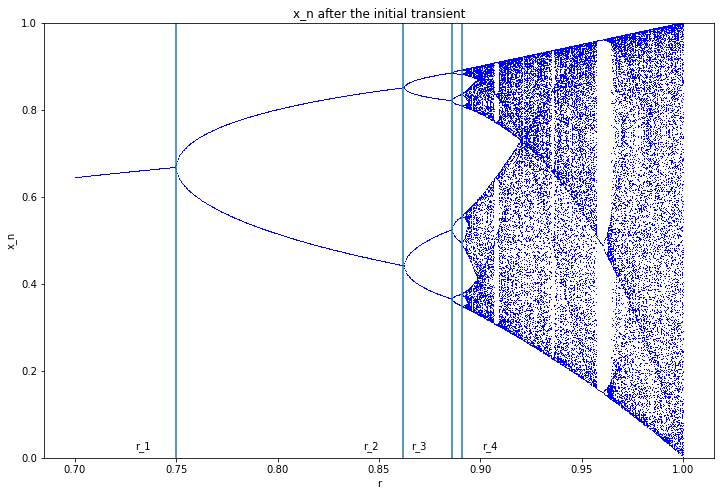

In [6]:
plot_bifurcation()

As $r$ increases, the values of $r$ where bifurcations occur get closer together, and the period increases to infinity. Chaos begins at $r_\infty=0.8924864$. The Feigenbaum $\delta$-number is defined by

$$r_n \approx r_\infty-c\delta^{-n}$$

where $r_n$ is the value of $r$ where the period doubles to $2^n$.

## Exercises

### Exercise 1

(a) Prove that

$$\delta = \frac{r_n-r_{n-1}}{r_{n+1}-r_n}$$

(b) Give a conceptual explanation of the meaning of this ratio.

## Chaos

The general definition of chaos is the "sensitive dependence on initial conditions and loss of long-term predictability." (Wang, Section 5.2)

Let's plot two trajectories on the same axes, with starting values x0 that are only 0.001 different. First consider $r=0.8$ which is not in the chaotic regime.

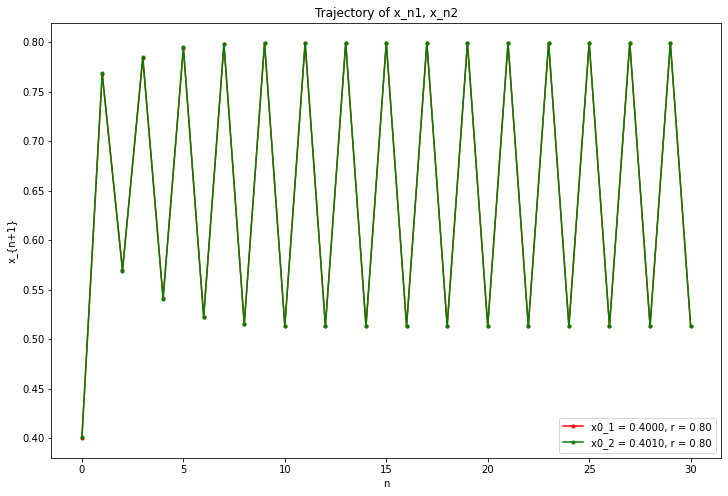

In [8]:
#starting values
x0_1=0.4
x0_2=x0_1+0.001
r=0.8
N=30

xn_1=trajectory(x0_1, r, N)
xn_2=trajectory(x0_2, r, N)
n=np.linspace(0,N,N+1)

plt.figure(figsize=(12,8))
plt.title("Trajectory of x_n1, x_n2")
plt.plot(n,xn_1,"r.-", label="x0_1 = %.4f, r = %.2f" % (x0_1, r))
plt.plot(n,xn_2,"g.-", label="x0_2 = %.4f, r = %.2f" % (x0_2, r))
plt.xlabel("n")
plt.ylabel("x_{n+1}")
plt.legend(loc="lower right")
plt.show()


There is some error during the transient, but the fixed points seem identical. Now let's look at $r=0.9$ which is chaotic.

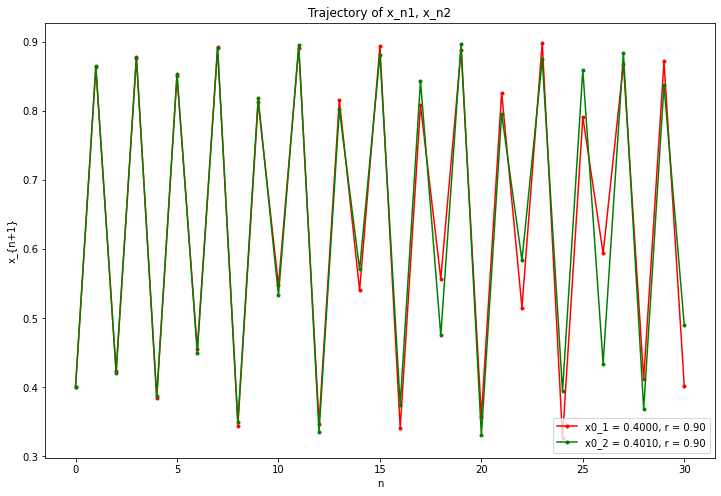

In [10]:
#starting values
x0_1=0.4
x0_2=x0_1+0.001
r=0.9
N=30

xn_1=trajectory(x0_1, r, N)
xn_2=trajectory(x0_2, r, N)
n=np.linspace(0,N,N+1)

plt.figure(figsize=(12,8))
plt.title("Trajectory of x_n1, x_n2")
plt.plot(n,xn_1,"r.-", label="x0_1 = %.4f, r = %.2f" % (x0_1, r))
plt.plot(n,xn_2,"g.-", label="x0_2 = %.4f, r = %.2f" % (x0_2, r))
plt.xlabel("n")
plt.ylabel("x_{n+1}")
plt.legend(loc="lower right")
plt.show()


Plot the difference in the two series. Start with $r=0.8$. Since the error is so small and decreases rapidly, make a semi-log plot.

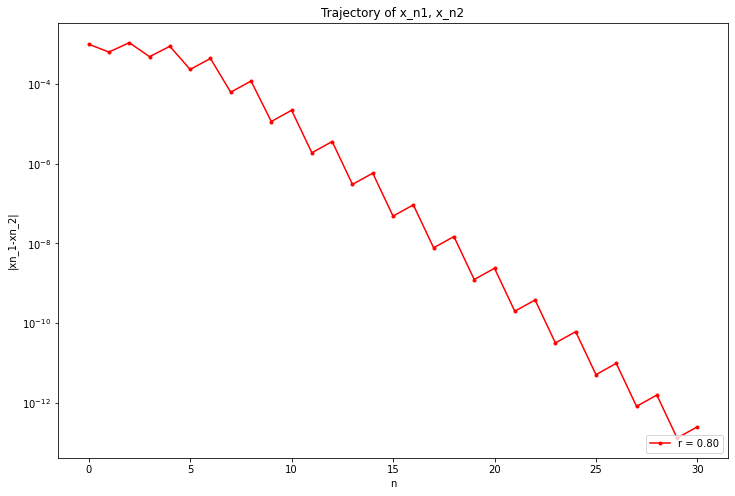

In [11]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.8
N=30

xn_1=np.array(trajectory(x0_1, r, N))
xn_2=np.array(trajectory(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

plt.figure(figsize=(12,8))
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

Note that the error decreases as $n$ increases. So the error is "disappearing" for larger iterations. The two series are becoming similar. (After all, they should approach the same attractors.) The average linear nature for larger $n$ suggests is an exponential decrease.

Here's the error for $r=0.9$ which is in the chaotic regime.

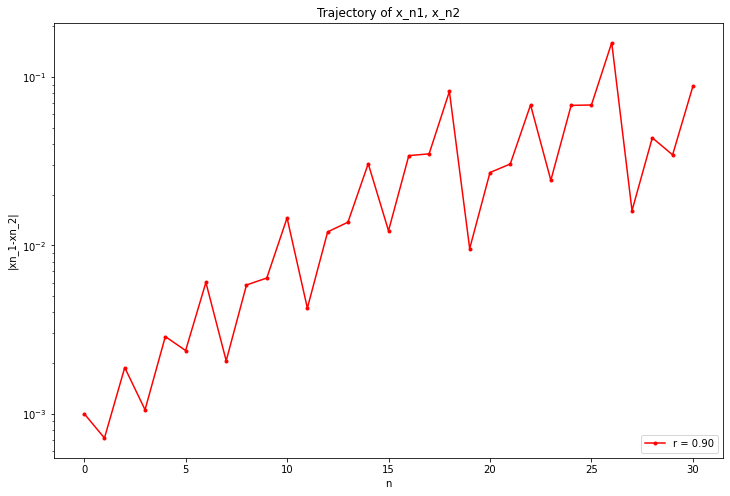

In [13]:
x0_1=0.4
x0_2=x0_1+0.001
r=0.9
N=30

xn_1=np.array(trajectory(x0_1, r, N))
xn_2=np.array(trajectory(x0_2, r, N))
dx = np.abs(xn_2-xn_1)
n=np.linspace(0,N,N+1)

plt.figure(figsize=(12,8))
plt.title("Trajectory of x_n1, x_n2")
plt.semilogy(n,dx,"r.-", label="r = %.2f" % (r))
plt.xlabel("n")
plt.ylabel("|xn_1-xn_2|")
plt.legend(loc="lower right")
plt.show()

The error increases with $n$ exponentially (approximately). This leads to an operational definition of chaos. It's a system for which small differences in intial conditions lead to "exponentially diverging outcomes." How chaotic the system is can be measured by the rate of exponential growth.

The difference in the two series is, to first-order approximation,

$\Delta x \approx c\epsilon e^{\lambda n}$

where $\epsilon = |x_{01}-x_{02}|$.

$\lambda$ is called the Lyapunov exponent. It is the average rate of exponential convergence or divergence. If $\lambda<0$, then the system is predictable (nonchaotic). If $\lambda>0$, the system is chaotic.

## Exercises

### Exercise 1

Do a linear fit to the semilog plots for $r=0.8$ and $r=0.9$. Find $\lambda$ in each case. Measure it before (or after) it levels off in each case.

### Exercise 2

Change $\epsilon$, but keep it much less than 1. Does $\lambda$ depend on $\epsilon$?